<a href="https://colab.research.google.com/github/andrefcmoraes/personalprojects/blob/main/Colab%3C3Julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Simulador de voo de foguete_

## Aviso
1. Propiedade intelectual: Carcará rocket design e André Felipe C. Morais

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots DifferentialEquations"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

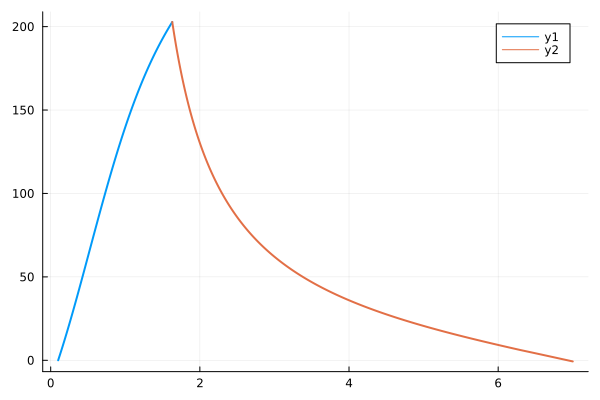

In [12]:
using Plots, DifferentialEquations
m0 = 1.0
m1 = 0.856
rho = 1.225
As = pi*(0.25)^2
Cd = 0.05
ve = 980.0
tq = 1.63
tm0 = 0.14
tm1 = 0.32
g = 9.81
tf = 7.0
tm(t) = tm0 + ((tm1-tm0)/tq)*t
m(t) = m0-((m0-m1)/tq)*t
f(v,p0,t) = ve*tm(t)/m(t) -g -(1/2)*(rho*As*Cd*v^2)/m(t)
v0 = 0.0
tspan = (0.0,tq)
prob = ODEProblem(f,v0,tspan)
sol = solve(prob, Vern9(), reltol=1e-8, abstol=1e-8, saveat=0.01)
R = sol[1,:]
function h(v,p1,t)
    if t < 0.9*tf
        -g -(1/2)*(rho*As*Cd*v^2)/m1
    else
        -g +(1/2)*(rho*As*Cd*v^2)/m1
    end
end
#h(v,p1,t) = -g -(1/2)*(rho*As*Cd*v^2)/m1
v1 = maximum(R)
ttspan = (tq,tf)
prob = ODEProblem(h,v1,ttspan)
lua = solve(prob, Vern9(), reltol=1e-8, abstol=1e-8, saveat=0.01)
RR = lua[1,:]
t = LinRange(0.1,tq,length(R))
tt = LinRange(tq,tf,length(RR))
plot(t,R,linewidth=2)
plot!(tt,RR,linewidth=2)

In [7]:
print(R)

[0.0, 1.2798878463239554, 2.5716324614483463, 3.8750510000304756, 5.189954706934161, 6.51614896880922, 7.85343337316565, 9.201601774992046, 10.560442371002862, 11.92973778138994, 13.30926513934684, 14.698796188088986, 16.098097385510503, 17.506930016381265, 18.9250503120322, 20.35220957745339, 21.78815432572127, 23.23262641962272, 24.685363220381596, 26.14609774332517, 27.614558820229888, 29.090471268463578, 30.573556066333655, 32.06353053471011, 33.56010852458504, 35.06300061033978, 36.571914288457975, 38.08655418141002, 39.60662224641195, 41.13181798876212, 42.66183867943258, 44.19637957657378, 45.73513415063048, 47.2777943126486, 48.82405064550436, 50.37359263756261, 51.92610891848407, 53.48128749690761, 55.03881599912414, 56.598381909086974, 58.159672808762565, 59.72237661866122, 61.28618183813044, 62.85077778498832, 64.4158548341011, 65.98110465450502, 67.54622044467718, 69.11089716556334, 70.67483177097967, 72.23772343500384, 73.79927377600212, 75.35918707690146, 76.9171705013832

In [11]:
vec = vcat(R, RR)

702-element Vector{Float64}:
  0.0
  1.2798878463239554
  2.5716324614483463
  3.8750510000304756
  5.189954706934161
  6.51614896880922
  7.85343337316565
  9.201601774992046
 10.560442371002862
 11.92973778138994
 13.30926513934684
 14.698796188088986
 16.098097385510503
  ⋮
  0.39910253002009527
  0.30101119450794744
  0.2029157105662904
  0.10481743001675854
  0.0067177048239117874
 -0.09138211295545746
 -0.1894806712612006
 -0.28757661811309626
 -0.38566860166331635
 -0.48375527028887244
 -0.581835272650362
 -0.679907257794518

In [ ]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    run(`nvidia-smi`)

    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
else
    println("No GPU found.")
end

Sun Jan  9 02:26:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />